In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from constants import *
import os
from eda_utils import *

In [3]:
# dir_list = os.listdir(root_data)
# dir_list

In [4]:
class InvalidImputerException(Exception):
    "Imputer type can only be KNN, Mean or Iterative"
    pass

In [11]:
df = pd.read_csv(f'{data_bihar}/bihar_512_sensor_era5.csv')
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')

In [12]:
df

,timestamp,block,district,latitude,longitude,rh,temp,blh,u10,v10,kx,sp,tp,pm25
0,2023-05-01 00:00:00,DUMARIA,GAYA,24.443,84.390,86.918462,22.851795,384.95580,2.263561,1.593873,29.509254,100473.860,0.0,53.623077
1,2023-05-01 01:00:00,DUMARIA,GAYA,24.443,84.390,87.380000,22.690000,407.17993,2.400915,1.338491,30.193565,100518.100,0.0,51.466667
2,2023-05-01 02:00:00,DUMARIA,GAYA,24.443,84.390,87.875000,22.686667,432.50488,2.334607,1.109128,30.701569,100585.350,0.0,51.433333
3,2023-05-01 03:00:00,DUMARIA,GAYA,24.443,84.390,88.555833,22.430417,475.71265,2.172624,0.749665,31.143830,100663.230,0.0,49.395833
4,2023-05-01 04:00:00,DUMARIA,GAYA,24.443,84.390,92.833333,21.595000,517.78320,2.040954,0.616673,31.361969,100722.516,0.0,49.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966465,2023-11-29 22:45:00,RAMNAGAR,WCHAMPARAN,27.160,84.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000
3966466,2023-11-29 23:00:00,RAMNAGAR,WCHAMPARAN,27.160,84.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.000000
3966467,2023-11-29 23:15:00,RAMNAGAR,WCHAMPARAN,27.160,84.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000
3966468,2023-11-29 23:30:00,RAMNAGAR,WCHAMPARAN,27.160,84.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.000000


In [13]:
# for _, data in df.iterrows():
#     assert data['Latitude'] == data['Meteo'][-2], "Latitude doesn't match"
#     assert data['Longitude'] == data['Meteo'][-1], "Longitude doesn't match"

In [14]:
df.isna().sum()

timestamp          0
block              0
district           0
latitude           0
longitude          0
rh            121383
temp          385231
blh          2627691
u10          2627691
v10          2627691
kx           2625404
sp           2627691
tp           2625404
pm25               0
dtype: int64

In [15]:
df.dtypes

timestamp    datetime64[ns]
block                object
district             object
latitude            float64
longitude           float64
rh                  float64
temp                float64
blh                 float64
u10                 float64
v10                 float64
kx                  float64
sp                  float64
tp                  float64
pm25                float64
dtype: object

In [19]:
data = df.copy(deep=True)
data['timestamp'] = data['timestamp'].values.astype(float)
cols = data.columns
print(cols)

for c in cols:
    if c == 'pm25': continue
    data[c] = (data[c] - data[c].mean()) / data[c].std()

data = data.to_numpy()

In [16]:
METHOD = 'iterative'
SPLIT = 'timestamp'
MODEL_TYPE = 'xgb'

In [ ]:
imputed_data = impute(data, method=METHOD)
print(train_and_eval(imputed_data, method=METHOD, model_dir=model_dir, split=SPLIT, model_type=MODEL_TYPE))

## Comparison between RT-RF model and XGBoost Model

In [15]:
# stat_df_rt_rf = pd.DataFrame(region_wise_stat(df.copy(deep=True), model_type='rt_rf', split_type='lat_long'))
# stat_df_xgboost = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type='lat_long'))

In [16]:
# stat_df_rt_rf

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,23.259689,0.873245,31.899756,0.664927
1,Gopalganj_data,21.277838,0.905924,42.312858,0.775578
2,West_Champaran_data,25.508067,0.851690,31.397402,0.627347


In [17]:
# stat_df_xgboost

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,11.200720,0.944233,44.262061,0.788250
1,Gopalganj_data,11.989865,0.961739,28.568738,0.881822
2,West_Champaran_data,11.618223,0.940258,27.900481,0.800646


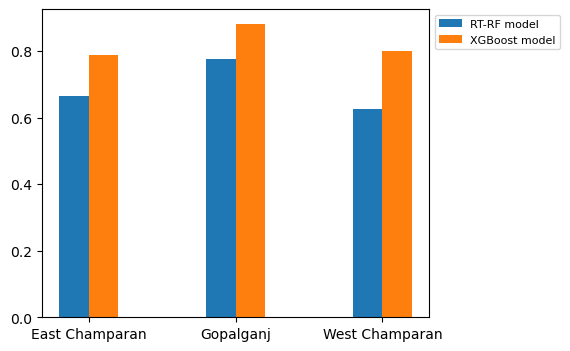

In [18]:
X_rt_rf, y_rt_rf, X_xgboost, y_xgboost = [], [], [], []


for i, data in stat_df_rt_rf.iterrows():
    X_rt_rf.append(i+1-0.1)
    y_rt_rf.append(data['Test_Pearson_R'])

for i, data in stat_df_xgboost.iterrows():
    X_xgboost.append(i+1+0.1)
    y_xgboost.append(data['Test_Pearson_R'])

width=0.2
X = [val for val in range(1, 4)]

plt.rcParams["figure.figsize"] = (5,4)
plt.bar(X_rt_rf, y_rt_rf, width, label='RT-RF model')
plt.bar(X_xgboost, y_xgboost, width, label='XGBoost model')
plt.xticks(X, ['East Champaran', 'Gopalganj', 'West Champaran'])
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=8, loc='upper left')

From the graph, Test RMSE, Test Pearson R values, we can conclude that XGBoost model performs better than the RT_RF sparse embedding model

## Comparison between different data imputation techniques

### XGBoost

In [19]:
methods = ['knn', 'mean', 'iterative']

for method in methods:
    if method == 'knn':
        stat_df_knn = pd.DataFrame(region_wise_stat(df.copy(deep=True), method=method, split_type='lat_long'))
    elif method == 'mean':
        stat_df_mean = pd.DataFrame(region_wise_stat(df.copy(deep=True), method=method, split_type='lat_long'))
    elif method == 'iterative':
        stat_df_iterative = pd.DataFrame(region_wise_stat(df.copy(deep=True), method=method, split_type='lat_long'))

In [20]:
stat_df_knn

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,13.831253,0.926145,28.946030,0.757138
1,Gopalganj_data,9.378755,0.970517,32.252393,0.867967
2,West_Champaran_data,13.248386,0.934533,24.734226,0.814176


In [21]:
stat_df_mean

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,10.951483,0.946355,36.699088,0.767144
1,Gopalganj_data,10.613923,0.966100,29.402556,0.859942
2,West_Champaran_data,12.367488,0.938139,28.255478,0.801970


In [22]:
stat_df_iterative

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,13.359606,0.92973,28.452006,0.826885
1,Gopalganj_data,10.083681,0.96708,28.690470,0.866361
2,West_Champaran_data,11.503538,0.94229,33.031446,0.735620


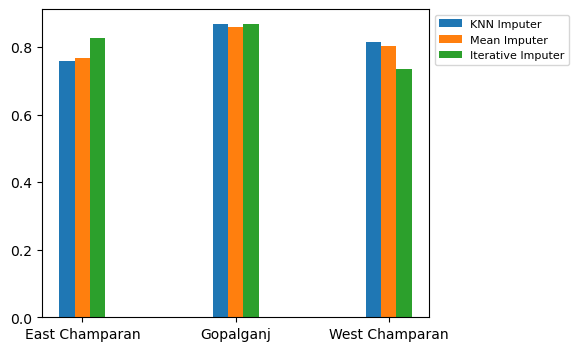

In [23]:
X_knn, y_knn, X_mean, y_mean, X_iterative, y_iterative = [], [], [], [], [], []

for method in methods:
        if method == 'knn':
            for i, data in stat_df_knn.iterrows():
                X_knn.append(i+1-0.1)
                y_knn.append(data['Test_Pearson_R'])
        elif method == 'mean':
            for i, data in stat_df_mean.iterrows():
                X_mean.append(i+1)
                y_mean.append(data['Test_Pearson_R'])
        elif method == 'iterative':
            for i, data in stat_df_iterative.iterrows():
                X_iterative.append(i+1+0.1)
                y_iterative.append(data['Test_Pearson_R'])

width=0.1
X = [val for val in range(1, 4)]

plt.rcParams["figure.figsize"] = (5,4)
plt.bar(X_knn, y_knn, width, label='KNN Imputer')
plt.bar(X_mean, y_mean, width, label='Mean Imputer')
plt.bar(X_iterative, y_iterative, width, label='Iterative Imputer')
plt.xticks(X, ['East Champaran', 'Gopalganj', 'West Champaran'])
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=8, loc='upper left')

### RT_RF

In [24]:
methods = ['knn', 'mean', 'iterative']

for method in methods:
    if method == 'knn':
        stat_df_knn = pd.DataFrame(region_wise_stat(df.copy(deep=True), model_type='rt_rf', method=method, split_type='lat_long'))
    elif method == 'mean':
        stat_df_mean = pd.DataFrame(region_wise_stat(df.copy(deep=True), model_type='rt_rf', method=method, split_type='lat_long'))
    elif method == 'iterative':
        stat_df_iterative = pd.DataFrame(region_wise_stat(df.copy(deep=True), model_type='rt_rf', method=method, split_type='lat_long'))

In [25]:
stat_df_knn

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,23.738635,0.879848,26.225348,0.696933
1,Gopalganj_data,24.878315,0.892603,39.930242,0.708248
2,West_Champaran_data,25.620515,0.849654,31.587526,0.608399


In [26]:
stat_df_mean

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,23.807171,0.854685,32.888186,0.619168
1,Gopalganj_data,24.879035,0.889535,37.086101,0.736733
2,West_Champaran_data,25.957141,0.850825,31.134523,0.652853


In [27]:
stat_df_iterative

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,24.220395,0.864256,30.448729,0.654757
1,Gopalganj_data,22.355164,0.898135,45.270117,0.715780
2,West_Champaran_data,23.404622,0.854983,38.383891,0.593520


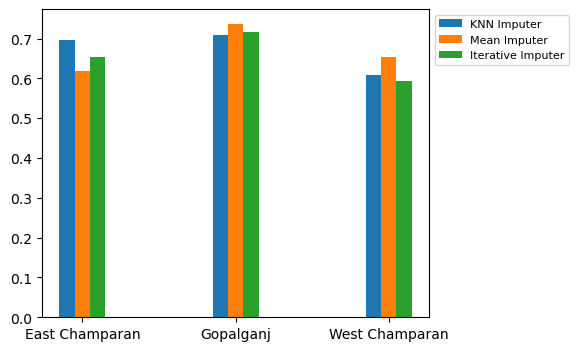

In [28]:
X_knn, y_knn, X_mean, y_mean, X_iterative, y_iterative = [], [], [], [], [], []

for method in methods:
        if method == 'knn':
            for i, data in stat_df_knn.iterrows():
                X_knn.append(i+1-0.1)
                y_knn.append(data['Test_Pearson_R'])
        elif method == 'mean':
            for i, data in stat_df_mean.iterrows():
                X_mean.append(i+1)
                y_mean.append(data['Test_Pearson_R'])
        elif method == 'iterative':
            for i, data in stat_df_iterative.iterrows():
                X_iterative.append(i+1+0.1)
                y_iterative.append(data['Test_Pearson_R'])

width=0.1
X = [val for val in range(1, 4)]

plt.rcParams["figure.figsize"] = (5,4)
plt.bar(X_knn, y_knn, width, label='KNN Imputer')
plt.bar(X_mean, y_mean, width, label='Mean Imputer')
plt.bar(X_iterative, y_iterative, width, label='Iterative Imputer')
plt.xticks(X, ['East Champaran', 'Gopalganj', 'West Champaran'])
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=8, loc='upper left')

From both the graphs above, the results seem a bit inconclusive towards providing the best imputer method. Although, the knn imputer does provide more balanced results over multiple trials.

## Comparison between Random, Latlong and Timestamp splits

In [29]:
split_types = ['random', 'lat_long', 'timestamp']

for split_type in split_types:
    if split_type == 'random':
        stat_df_random = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type=split_type, model_type='xg_boost'))
    elif split_type == 'lat_long':
        stat_df_latlong = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type=split_type, model_type='xg_boost'))
    elif split_type == 'timestamp':
        stat_df_timestamp = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type=split_type, model_type='xg_boost'))

In [30]:
stat_df_random

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,13.199066,0.934513,26.592928,0.871139
1,Gopalganj_data,11.849812,0.958829,22.163569,0.916190
2,West_Champaran_data,12.098165,0.935395,26.892460,0.846506


In [31]:
stat_df_latlong

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,13.181074,0.936699,27.367163,0.766776
1,Gopalganj_data,12.583120,0.956656,24.847655,0.888341
2,West_Champaran_data,12.760162,0.939858,28.029857,0.717085


In [32]:
stat_df_timestamp

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,12.178787,0.932837,26.889867,0.844780
1,Gopalganj_data,11.457537,0.959889,23.840017,0.908685
2,West_Champaran_data,11.639187,0.937575,28.807339,0.810037


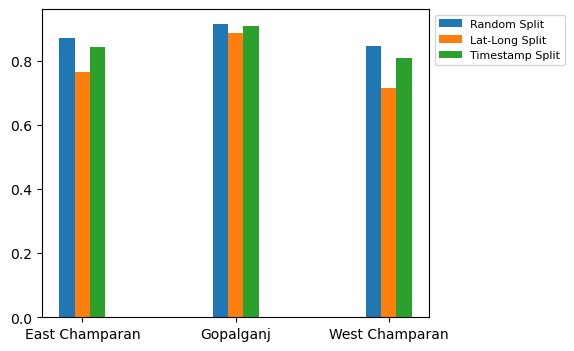

In [33]:
X_random, y_random, X_latlong, y_latlong, X_timestamp, y_timestamp = [], [], [], [], [], []

for split_type in split_types:
        if split_type == 'random':
            for i, data in stat_df_random.iterrows():
                X_random.append(i+1-0.1)
                y_random.append(data['Test_Pearson_R'])
        elif split_type == 'lat_long':
            for i, data in stat_df_latlong.iterrows():
                X_latlong.append(i+1)
                y_latlong.append(data['Test_Pearson_R'])
        elif split_type == 'timestamp':
            for i, data in stat_df_timestamp.iterrows():
                X_timestamp.append(i+1+0.1)
                y_timestamp.append(data['Test_Pearson_R'])

width=0.1
X = [val for val in range(1, 4)]

plt.rcParams["figure.figsize"] = (5,4)
plt.bar(X_random, y_random, width, label='Random Split')
plt.bar(X_latlong, y_latlong, width, label='Lat-Long Split')
plt.bar(X_timestamp, y_timestamp, width, label='Timestamp Split')
plt.xticks(X, ['East Champaran', 'Gopalganj', 'West Champaran'])
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=8, loc='upper left')

## Comparison between complete data, exclude timestamp

### Timestamp Split

In [34]:
stat_df_complete = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type='timestamp'))
stat_df_ex_timestamp = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type='timestamp', include_timestamp=False))

In [35]:
stat_df_complete

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,12.178787,0.932837,26.889867,0.844780
1,Gopalganj_data,11.457537,0.959889,23.840017,0.908685
2,West_Champaran_data,11.639187,0.937575,28.807339,0.810037


In [36]:
stat_df_ex_timestamp

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,25.455513,0.702423,38.541264,0.506289
1,Gopalganj_data,29.532964,0.749276,47.839583,0.582588
2,West_Champaran_data,22.011712,0.748873,39.173796,0.438220


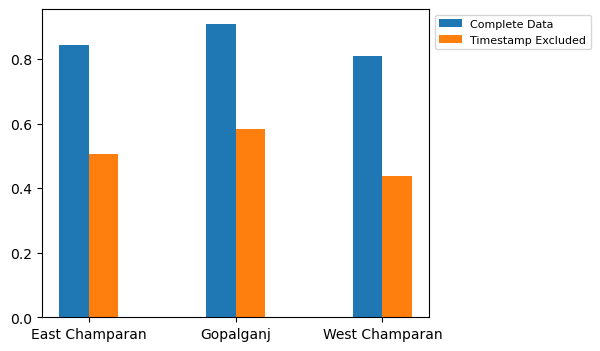

In [37]:
X_complete, y_complete, X_ex_timestamp, y_ex_timestamp = [], [], [], []

for i, data in stat_df_complete.iterrows():
    X_complete.append(i+1-0.1)
    y_complete.append(data['Test_Pearson_R'])

for i, data in stat_df_ex_timestamp.iterrows():
    X_ex_timestamp.append(i+1+0.1)
    y_ex_timestamp.append(data['Test_Pearson_R'])

width=0.2
X = [val for val in range(1, 4)]

plt.rcParams["figure.figsize"] = (5,4)
plt.bar(X_complete, y_complete, width, label='Complete Data')
plt.bar(X_ex_timestamp, y_ex_timestamp, width, label='Timestamp Excluded')
plt.xticks(X, ['East Champaran', 'Gopalganj', 'West Champaran'])
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=8, loc='upper left')

### Random Split

In [38]:
stat_df_complete = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type='random'))
stat_df_ex_timestamp = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type='random', include_timestamp=False))

In [39]:
stat_df_complete

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,12.658590,0.934101,26.489130,0.870125
1,Gopalganj_data,12.020602,0.958761,23.380894,0.913690
2,West_Champaran_data,11.398368,0.939714,30.358783,0.863424


In [40]:
stat_df_ex_timestamp

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,27.370385,0.678507,38.713051,0.517008
1,Gopalganj_data,31.621822,0.729666,48.646990,0.584577
2,West_Champaran_data,23.595192,0.709002,38.883684,0.473494


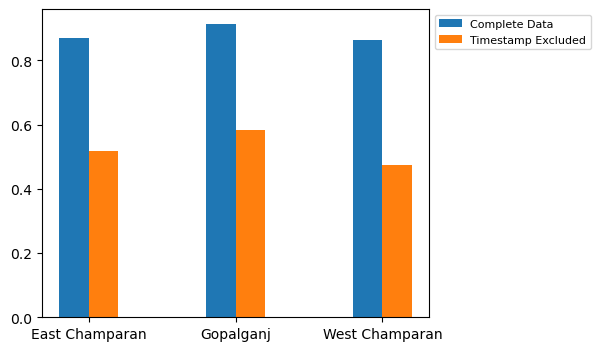

In [41]:
X_complete, y_complete, X_ex_timestamp, y_ex_timestamp = [], [], [], []

for i, data in stat_df_complete.iterrows():
    X_complete.append(i+1-0.1)
    y_complete.append(data['Test_Pearson_R'])

for i, data in stat_df_ex_timestamp.iterrows():
    X_ex_timestamp.append(i+1+0.1)
    y_ex_timestamp.append(data['Test_Pearson_R'])

width=0.2
X = [val for val in range(1, 4)]

plt.rcParams["figure.figsize"] = (5,4)
plt.bar(X_complete, y_complete, width, label='Complete Data')
plt.bar(X_ex_timestamp, y_ex_timestamp, width, label='Timestamp Excluded')
plt.xticks(X, ['East Champaran', 'Gopalganj', 'West Champaran'])
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=8, loc='upper left')

### Lat Long split

In [42]:
stat_df_complete = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type='lat_long'))
stat_df_ex_timestamp = pd.DataFrame(region_wise_stat(df.copy(deep=True), split_type='lat_long', include_timestamp=False))

In [43]:
stat_df_complete

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,12.936145,0.930887,26.664133,0.826753
1,Gopalganj_data,11.075666,0.961285,34.246891,0.824380
2,West_Champaran_data,11.601002,0.937070,27.960396,0.793854


In [44]:
stat_df_ex_timestamp

,Region,Train_RMSE,Train_Pearson_R,Test_RMSE,Test_Pearson_R
0,East_Champaran_data,26.731526,0.678374,48.290564,0.279517
1,Gopalganj_data,31.441457,0.746872,50.794438,0.449581
2,West_Champaran_data,24.048403,0.683753,39.670614,0.356953


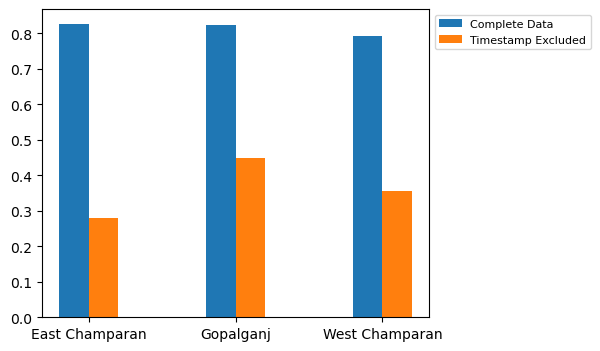

In [45]:
X_complete, y_complete, X_ex_timestamp, y_ex_timestamp = [], [], [], []

for i, data in stat_df_complete.iterrows():
    X_complete.append(i+1-0.1)
    y_complete.append(data['Test_Pearson_R'])

for i, data in stat_df_ex_timestamp.iterrows():
    X_ex_timestamp.append(i+1+0.1)
    y_ex_timestamp.append(data['Test_Pearson_R'])

width=0.2
X = [val for val in range(1, 4)]

plt.rcParams["figure.figsize"] = (5,4)
plt.bar(X_complete, y_complete, width, label='Complete Data')
plt.bar(X_ex_timestamp, y_ex_timestamp, width, label='Timestamp Excluded')
plt.xticks(X, ['East Champaran', 'Gopalganj', 'West Champaran'])
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize=8, loc='upper left')